# Simulatie - les 2

Notebook bij les 2 van de leerlijn simulatie van S3 - AI. 

© Auteur: Joost Vanstreels

**Voorbereiding voor les 2:**
- Geen voorbereiding nodig, behalve dat je alle opdrachten uit les 1 afgerond moet hebben.

## Geavanceerde data analytics
Tijdens college 1 hebben we gebruik gemaakt van de simulatieomgeving waarbij in Streamlit de resultaten van een run getoond werden. Jullie hebben gemerkt dat het analyseren van een run omslachtig was en het ook niet eenvoudig was om meerdere runs met elkaar te vergelijken. 

Tijdens dit college gaan we kijken naar manieren om data te manipuleren om meer informatie te achterhalen en we gaan naar manieren kijken om die informatie te visualiseren.

## Data manipuleren
Bij data wordt er vaak gesproken over verschillende *niveau's*. Data op het laagste of individuele niveau gaat over de status van alle entiteiten (patiënt en bed) op elk tijdstip. Dat is essentiële informatie voor het runnen van een simulatie, maar dit niveau van data is vaak niet interessant om te analyseren.

Door data te manipuleren ontstaat nieuwe data die wél interessant is om te analyseren. Denk aan het filteren (bepaalde informatie verwijderen), groeperen van data (bij-elkaar-horende data combineren) of het uitvoeren van berekeneningen (tellen, gemiddelde, maximum, etc.). Hiermee creëer je een nieuwe niveau van data. Tijdens dit college gaan we stap-voor-stap nieuwe niveau's toevoegen aan de data waarmee nieuwe analyses uitgevoerd kunnen worden.

### Definities
Voordat we naar de niveau's gaan kijken, zullen we eerst een aantal definities geven van termen die we vaak tegen zullen komen.

- **Onderzoeksvraag**
Het doel van onderzoek doen met behulp van simulaties is om antwoord te krijgen op een vraag. Vaak is die vraag terug te brengen tot een algemene onderzoeksvraag: welk *scenario* (dus welke samenstelling van resources [a,b,c]) helpt om doelstellingen [x, y, z] te behalen?

- **Experiment**
Een experiment heeft als doel om de onderzoeksvraag te beantwoorden. Een experiment bestaat uit het simuleren van meerdere scenario's om te bepalen welk scenario het beste is.

- **Scenario**
Elk scenario dat interessant is, ga je dus simuleren. Bij de ICU casus hebben jullie tijdens college 1 simulaties gedraaid voor verschillende scenario's van de ICU waarin de hoeveelheid bedden telkens verschilde. Het *beste* scenario hebben jullie bepaald door te kijken naar het aantal overlijdens per scenario.  

- **Run**
Het uitvoeren van één simulatie wordt een run genoemd. Bij de ICU casus hebben jullie voor elk scenario één run uitgevoerd op basis van de historische data. Het heeft geen zin om een meerdere runs uit te voeren voor dat scenario omdat de resultaten hetzelfde zullen zijn. Tijdens college 3 gaan we echter werken met synthetische data. We gaan dan data genereren waarmee gesimuleerd wordt. Stel dat de ligtijd van patiënten gemiddeld 48 uur is met een standaarddeviatie van 12 uur, dan kun je voor een reeks patiënten hun ligtijd bepalen door willekeurige trekkingen te doen uit een normaalverdeling. Je kunt dan meerdere simulaties runnen voor elk scenario want elke reeks synthetische data is uniek vanwege de willekeurige trekkingen. In dat geval heeft het wel zin om meerdere runs uit te voeren voor een scenario. Dit komt uitgebreid terug tijdens colleges 3 en 4.

- **Resultaten van runs**
Een run levert data op waarmee KPI's berekend kunnen worden. De KPI's van alle runs kunnen onderling vergeleken worden. Met deze data kan de onderzoeksvraag beantwoord worden.  

### Verschillende niveau's ICU casus
Hieronder worden verschillende stappen geschetst waarin telkens nieuwe informatie wordt gegenereerd. Je zult merken dat elke stap resulteert in minder rijen en/of kolommen data maar in meer informatie!

#### Laagste niveau: simulatiedata
Deze simulatiedata is het directe resultaat van de simulatie: de simulator heeft voor elk tijdstip de status van alle entiteiten bepaald en vastgelegd. Voor elk tijdstip worden dus alle activiteiten van patiënten en bedden vastgelegd. Deze data is niet interessant om te analyseren: ten eerste zijn er veel tijdstippen waarop er niks gebeurt, die tijdstippen zijn niet interessant en kunnen gefilterd worden. De simulatiedata is gecentreerd op tijdstippen waarop events plaats vinden, maar voor de analyse zijn deze tijdstippen van de events of events van individuele patiënten niet zo relevant. Het gaat juist om de hoeveelheid patiënten in een bepaalde status op bepaalde tijdstippen en de tijd tussen events. Deze informatie kan berekend worden en leidt tot bepaalde *statistieken*.

#### Statistieken per entiteit
Om tot de statistieken te komen, moet de simulatiedata eerst gemanipuleerd worden. De simulator doet deze manipulatie al voor jullie en dat levert de statistieken per entiteit op. Je kunt de simlulatiedata daarom ook niet downloaden vanaf het Streamlit dashboard.

Het ```ICU - Patient_Timing``` bestand bevat de statistieken van alle patiënten. Voor elke unieke patiënt uit de simulatiedata is gekeken naar het tijdstip van bepaalde events en de tijd tussen verschillende events. Deze berekeningen hebben geleid tot een overzicht met statistieken per patiënt. 

Voor de andere belangrijke entiteit van de ICU, de bedden, zou je vergelijkbare data kunnen verzamelen. Die data is echter niet beschikbaar omdat het minder relevant is om analyses van individuele bedden te maken. In de volgende stap wordt er wel met data over de bedden gewerkt.

#### Statistieken van het scenario
Elk scenario beschrijft een unieke ICU met een bepaalde instroom, een wachtrij, een aantal bedden en patiënten die naar huis gaan of komen te overlijden. Door de statistieken van alle states van de ICU te beschouwen, kunnen we de statistieken van de ICU van dit scenario bepalen. Het ```ICU - ICU``` bestand is ook gebaseerd op de simulatiedata maar kijkt naar alle entiteiten van de ICU samen. Voor elk tijdstip uit de simulatie is gekeken naar het aantal patiënten in de wachtrij en het aantal patiënten dat behandeld werd, daarnaast is bijgehouden hoeveel mensen er behandeld en overleden waren. Op basis van deze data is ook bepaald hoeveel bedden er vrij en bezet waren. Deze berekeningen hebben geleid tot een overzicht met statistieken per tijdstip van de ICU. 

Deze statistieken lenen zich goed om meer inzicht te creëren in een complete run van een simulatie. Zo kun je bijvoorbeeld de distributie of het verloop over de tijd van bepaalde statistieken in kaart brengen. Hiermee kun je verschillende runs met elkaar te vergelijken. Het is daarbij van belang om de data dan per run te groeperen.

#### Analyse experiment
Door de statistieken van de vorige twee stappen te combineren heb je alle informatie van dit experiment verzameld en kun je alle scenario's onderling vergelijken en de onderzoeksvraag beantwoorden.

## Data visualiseren
Zoals eerder gesteld, heeft een experiment als doel om een onderzoeksvraag te beantwoorden. Zo'n onderzoeksvraag kan best *vaag* zijn, daarom zijn er ook nog de KPI's (de *Key Performance Indicators*) die de kwaliteit concreter en kwantificeerbaar kunnen maken. Een experiment bestaat uit verschillende runs van een simulatie en deze runs moeten geanalyseerd worden om de onderzoeksvraag te kunnen beantwoorden en de KPI's inzichtelijk te maken.  Een belangrijke manier om deze analyse uit te voeren, is het maken van visualisaties.

De eerste stap bij het maken van een visualisatie is nadenken *wat* het doel is en *welke* informatie je wilt tonen. Wanneer je meer inzicht wilt krijgen in een bepaalde run, kun je informatie tonen over de gebruikte resources van zo'n run en de KPI's van die run. Wanneer je meerdere runs hebt gesimuleerd, wil je die runs misschien onderling vergelijken. Mogelijk zijn er KPI's die verschillen per run en die informatie kan helpen om een keuze te maken tussen welke run *het beste* was. Stap 1 bestaat dus uit het maken van een overzicht van alle relevante parameters en variabelen van de simulatie (bijv. het aantal resources) en de resultaten van de simulatie (bijv. de KPI's).

De tweede stap is bedenken *hoe* je die informatie gaat tonen. Bij de colleges over data zijn verschillende visualisaties besproken die allemaal bruikbaar zijn. Dit blog kan je helpen om de juiste visualisatie te kiezen: https://blog.bijleshuis.nl/hoe-maak-je-een-grafiek-en-welke-soort-grafiek-moet-je-gebruiken. 

## Opdrachten ICU
We gaan verder met de analyse van simulaties op basis van de historische dataset. Hiervoor moeten een aantal bewerkingen op de data uitgevoerd worden en visualisaties gemaakt worden. Deze visualisaties hoeven **NIET** in Streamlit gemaakt te worden, deze mogen *gewoon* in een notebook runnen.

### Deel 1 - Statistieken van entiteiten visualiseren

Run eerst een aantal simulaties op basis van het nieuwe yaml bestand ICU_les2.yaml.

Het eerste deel gaat over het analyseren van de statistieken van entiteiten zoals patiënten en bedden.

**Opdracht 1.1.** Statistieken van patiënten visualiseren

Bij de eerste opdracht gaan we de statistieken van de patiënten analyseren. Van elke patiënt weten we hoe lang deze in de wachtrij heeft gestaan, hoe lang deze in bed heeft gelegen en of deze behandeld of overleden is. Deze data is te vinden in ```ICU - Patient_Timing.csv```. Het doel van de eerste opdracht is om een visualisatie te maken die kan helpen om de resultaten van een bepaald scenario (run) te analyseren. 

Maak visualisaties van de volgende statistieken:
- Distributie van de tijd in de wachtrij van alle patiënten  
- Distributie van de tijd in bed van alle patiënten  

Neem eerst de data van één scenario om de visualisatie te maken.

Denk eerst na over de volgende zaken:
- Welke data heb je nodig? Welke data is beschikbaar? Welke manipulaties zijn nodig?
- Welke informatie wil je tonen? Welke visualisatie past daarbij? Hoe moet je de visualisatie opbouwen qua x-as, y-as, etc.?
Daarna mag je aan de slag.

Laat dat ontwerp eerst accorderen en ga daarna bouwen. **Tip**: teken het ontwerp uit op papier. Dat is de snelste manier!

**Opdracht 1.2.** Scenario's vergelijken

Combineer nu de data van alle scenario's en zorg dat in elke visualisatie de scenario's vergeleken kunnen worden.
 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv("ICU - Patient_Timing.csv")
data.head()

,beds.slots,world_id,id,condition,arrived,waiting,bed_time,treated,died
0,115,0,0,A,0.0,0.0,24.0,24.0,NaN
1,115,0,1,B,0.0,0.0,27.0,27.0,NaN
2,115,0,2,B,0.0,0.0,26.0,26.0,NaN
3,115,0,3,B,0.0,0.0,22.0,22.0,NaN
4,115,0,4,B,0.0,0.0,28.0,28.0,NaN


In [90]:
data_scenario_1 = data[data["beds.slots"] == 115]

Text(0.5, 1.0, 'Distributie tijd in bed per patient')

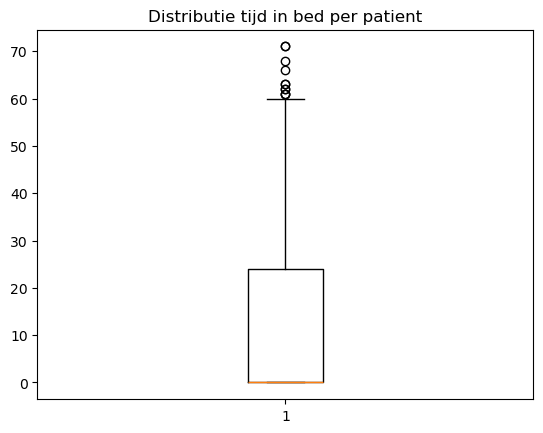

In [91]:
plt.boxplot(data_scenario_1["bed_time"])
plt.title("Distributie tijd in bed per patient")

Text(0.5, 1.0, 'Distributie tijd in bed per patient')

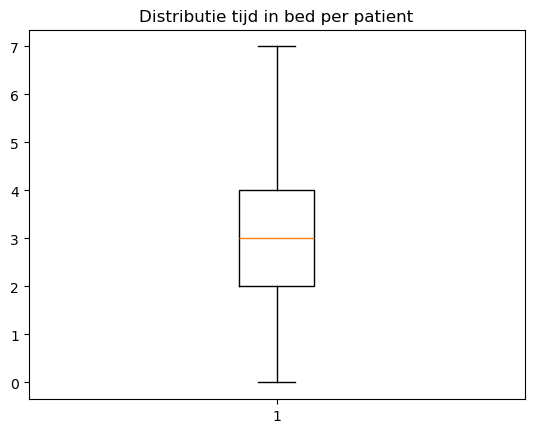

In [92]:
plt.boxplot(data_scenario_1["waiting"])
plt.title("Distributie tijd in bed per patient")

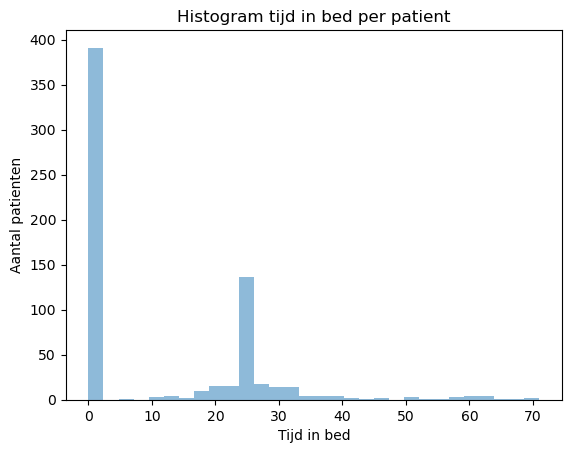

In [93]:
import matplotlib.pyplot as plt
import numpy as np

data1 = data_scenario_1["bed_time"]

plt.hist(data1, bins=30, alpha=0.5, label="Dataset 1")
plt.title("Histogram tijd in bed per patient")
plt.ylabel("Aantal patienten")
plt.xlabel("Tijd in bed")
plt.show()

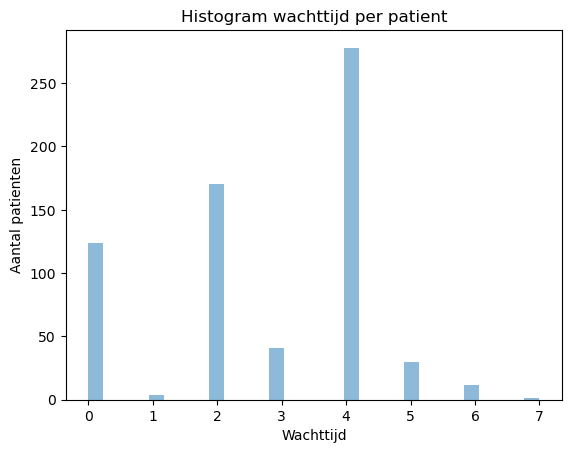

In [94]:
import matplotlib.pyplot as plt
import numpy as np

data1 = data_scenario_1["waiting"]

plt.hist(data1, bins=30, alpha=0.5, label="Dataset 1")
plt.title("Histogram wachttijd per patient")
plt.ylabel("Aantal patienten")
plt.xlabel("Wachttijd")
plt.show()

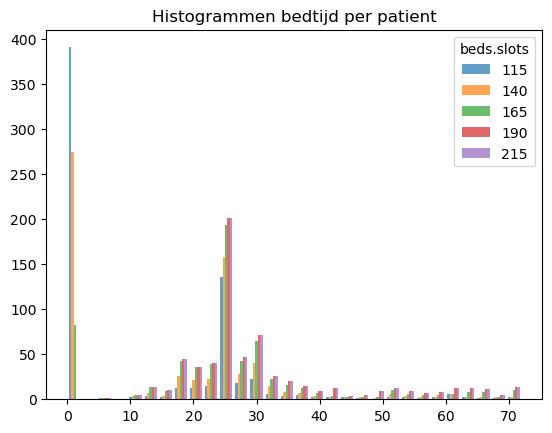

In [95]:
import matplotlib.pyplot as plt
import numpy as np

data1 = data[data["beds.slots"] == 115]["bed_time"]
data2 = data[data["beds.slots"] == 140]["bed_time"]
data3 = data[data["beds.slots"] == 165]["bed_time"]
data4 = data[data["beds.slots"] == 190]["bed_time"]
data5 = data[data["beds.slots"] == 215]["bed_time"]

plt.hist([data1, data2, data3, data4, data5], 
         bins=30, 
         label=["115", "140", "165", "190", "215"],
         alpha=0.7)

plt.legend(title="beds.slots")
plt.title("Histogrammen bedtijd per patient")
plt.show()

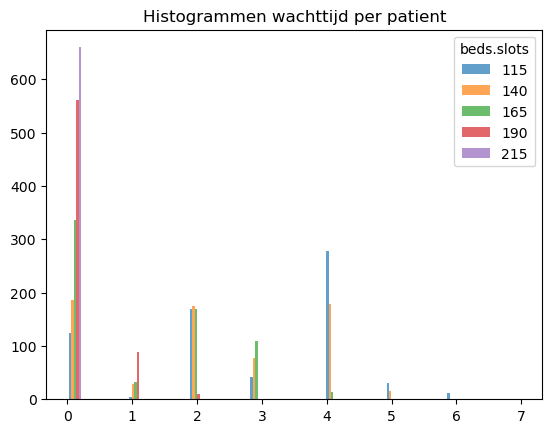

In [96]:
import matplotlib.pyplot as plt
import numpy as np

data1 = data[data["beds.slots"] == 115]["waiting"]
data2 = data[data["beds.slots"] == 140]["waiting"]
data3 = data[data["beds.slots"] == 165]["waiting"]
data4 = data[data["beds.slots"] == 190]["waiting"]
data5 = data[data["beds.slots"] == 215]["waiting"]

plt.hist([data1, data2, data3, data4, data5], 
         bins=30, 
         label=["115", "140", "165", "190", "215"],
         alpha=0.7)

plt.legend(title="beds.slots")
plt.title("Histogrammen wachttijd per patient")
plt.show()

### Deel 2 - Statistieken van scenario visualiseren

**Opdracht 2.1.** Statistieken van de wachtrij en bedden

Bij de tweede opdracht gaan we niet naar individuele patiënten kijken maar naar alle patiënten *samen* in een bepaalde state. We gaan de statistieken van de wachtrij en de bedden van de ICU analyseren en kijken naar de hoeveelheid patiënten die beter naar huis gaan of komen te overlijden. Deze data is te vinden in ```ICU - ICU.csv```.

Maak visualisaties van de volgende statistieken:
- Distributie van het aantal mensen in de wachtrij  
- Distributie van het aantal bezette bedden  
- Verloop van het aantal behandelde en overleden patiënten over de tijd 

Neem eerst de data van één scenario om de visualisatie te maken.

Denk eerst na over de volgende zaken:
- Welke data heb je nodig? Welke data is beschikbaar? Welke manipulaties zijn nodig?
- Welke informatie wil je tonen? Welke visualisatie past daarbij? Hoe moet je de visualisatie opbouwen qua x-as, y-as, etc.?
Daarna mag je aan de slag.

Laat dat ontwerp eerst accorderen en ga daarna bouwen. **Tip**: teken het ontwerp uit op papier. Dat is de snelste manier!

**Opdracht 2.2.** Scenario's vergelijken

Combineer nu de data van alle scenario's en zorg dat in elke visualisatie de scenario's vergeleken kunnen worden.

In [97]:
data_ICU = pd.read_csv("ICU - ICU.csv")
data_ICU.head()

,beds.slots,world_id,hours,Beds in use,Patients waiting,Patients treated,Patients died
0,115,0,0.0,6.0,0.0,0.0,0.0
1,115,0,1.0,10.0,0.0,0.0,0.0
2,115,0,2.0,17.0,0.0,0.0,0.0
3,115,0,3.0,19.0,0.0,0.0,0.0
4,115,0,4.0,26.0,0.0,0.0,0.0


In [98]:
data_ICU_scenario_1 = data_ICU[data_ICU["world_id"] == 0]

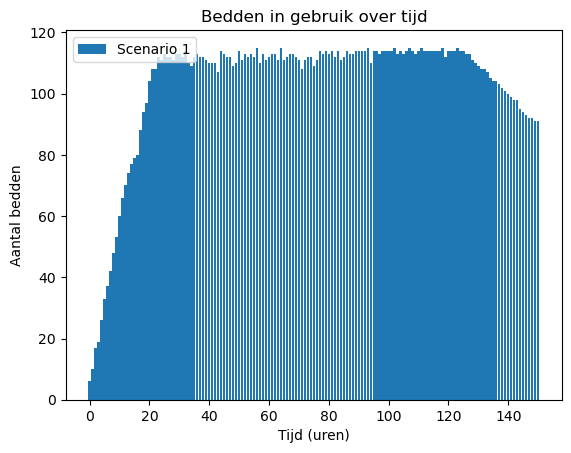

In [108]:
beds = data_ICU_scenario_1["Beds in use"]
hours = data_ICU_scenario_1["hours"]

plt.bar(hours, beds, label="Scenario 1", width=0.8)
plt.title("Bedden in gebruik over tijd")
plt.xlabel("Tijd (uren)")
plt.ylabel("Aantal bedden")
plt.legend()
plt.show()

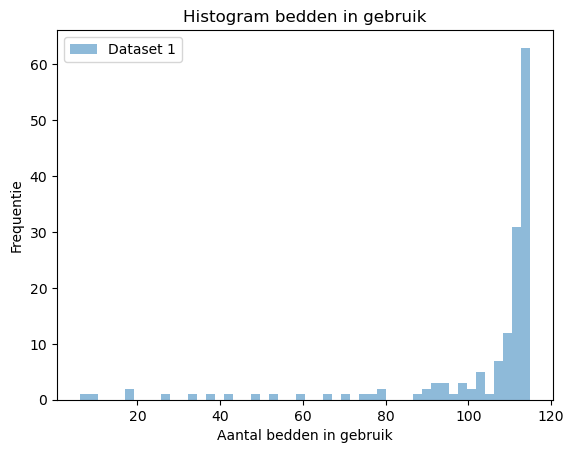

In [114]:
beds = data_ICU_scenario_1["Beds in use"]

plt.hist(beds, bins=50, alpha=0.5, label="Dataset 1")  # fewer, wider bins
plt.title("Histogram bedden in gebruik")
plt.ylabel("Frequentie")
plt.xlabel("Aantal bedden in gebruik")
plt.legend()
plt.show()

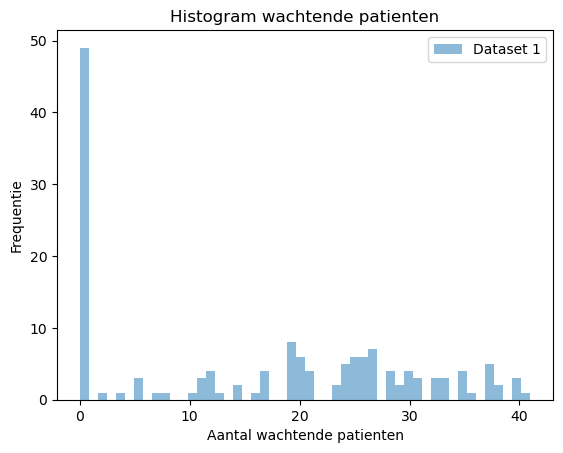

In [116]:
waiting = data_ICU_scenario_1["Patients waiting"]

plt.hist(waiting, bins=50, alpha=0.5, label="Dataset 1")  # fewer, wider bins
plt.title("Histogram wachtende patienten")
plt.ylabel("Frequentie")
plt.xlabel("Aantal wachtende patienten")
plt.legend()
plt.show()

### Deel 3 - Analyse experiment

Bij het derde deel gaan we de stap nemen naar de volgende datalaag en gaan we het gehele experiment analyseren. Dat resulteert in dataframe waarmee we alle KPI's van elk scenario kunnen bepalen.

De KPI's die we willen visualiseren zijn de volgende:
- Aantal doden
- Gemiddelde en maximale wachttijd van patiënten
- Gemiddelde en maximale aantal mensen in de wachtrij
- Gemiddelde en maximale bezetting van de bedden

**Opdracht 3.1.** Data combineren en aggregeren

Op basis van de statistieken van alle entiteiten uit deel 1 en de statistieken van het scenario uit deel 2, kun je alle data verzamelen om scenario' onderling te vergelijken.  

Je zult twee acties moeten uitvoeren:
1. De eerste stap is het combineren van de data: denk na over welke informatie uit opdrachten 1 en 2 interessant is om te tonen. 
2. De tweede stap is het aggregeren van data: hierbij voer je bepaalde berekeningen uit op de inhoud van alle rijen van een bepaalde feature. Bepaal eerst welke aggregaties interessant zijn en laat dat accorderen. 
**Merk op**: het kan ook mogelijk zijn dat je eerst gaat aggregeren en dan pas gaat combineren. 

**Opdracht 3.2.** Data visualiseren

De geaggregeerde data bevat statistieken van elke run, een visualisatie kan helpen om in één oogopslag de verschillende runs met elkaar te vergelijken. 

Denk zelf eerst over een ontwerp van een visualisatie die kan helpen om dat doel te bereiken:
- Welk type visualisatie leent zich hiervoor?
- Welke features wil je visualiseren?

Laat dat ontwerp accorderen en ga daarna bouwen.

**Opdracht 3.3.** Bedrijfsbeslissing

We sluiten af met de allerbelangrijkste opdracht: het maken van bedrijfsbeslissingen. Bepaal op basis van bovenstaande visualisaties hoe de ICU ingericht zou moeten worden om de KPI's te behalen. Onderbouw uiteraard jouw advies goed.